<h1><center><font size = 8>Assignment 4</font></center></h1>
<h1><center><font size = 5>Zach Chase</font></center></h1>

In [189]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.linear_model import SGDRegressor, Lasso, ElasticNet, Ridge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Part 1: Data Exploration
Read in bike_share_hour.csv as a pandas dataframe. The columns are described in the bike_share_readme.txt if you need more information about them.
* Look at the dataset, and convert the columns that are categorical to a pandas “category” type. 
* Look for non-null values in the dataset. 
* Do a descriptive analysis of the numeric columns. 
* Implement a bar plot of cnt versus season. Document which season has the most bike rides and which season has the least. 
* Implement a bar chart for working day versus count. Document howbikerides are distributed across these two classes.
* Implement a bar chart for month versus count. Document which monthshave the most bike rides. 
* Implement code to figure out which months belong to which seasons. 
* Implement a bar plot of weathersit versus cnt. Document which weather
situation has less bike rentals. 
* Implement a point plot of weathersit on the x-axis, count on the y-axis, andthe season as the hue. Document how season and weathersit arerelated. 
* Implement a bar plot of hour versus count. Are there any specific hoursthat are busier than others?
* Implement a bar plot of hour versus count on weekends and holidays(when workingday = 0). Does the hourly trend change on weekends?

In [205]:
df = pd.read_csv("bike_share_hour.csv")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Convert Columns

In [9]:
df.dtypes

instant          int64
dteday          object
season           int64
yr               int64
mnth             int64
hr               int64
holiday          int64
weekday          int64
workingday       int64
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

In [206]:
df['weathersit'] = df['weathersit'].astype('category')
df['season'] = df['season'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['yr'] = df['yr'].astype('category')
df['mnth'] = df['mnth'].astype('category')
df['hr'] = df['hr'].astype('category')
df['weekday'] = df['weekday'].astype('category')

In [18]:
df.dtypes

instant          int64
dteday          object
season        category
yr            category
mnth          category
hr               int64
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

## Loof for non null

In [207]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [15]:
for col in df.columns:
    print(col)
    print(df[col].unique(), '\n')

instant
[    1     2     3 ... 17377 17378 17379] 

dteday
['2011-01-01' '2011-01-02' '2011-01-03' '2011-01-04' '2011-01-05'
 '2011-01-06' '2011-01-07' '2011-01-08' '2011-01-09' '2011-01-10'
 '2011-01-11' '2011-01-12' '2011-01-13' '2011-01-14' '2011-01-15'
 '2011-01-16' '2011-01-17' '2011-01-18' '2011-01-19' '2011-01-20'
 '2011-01-21' '2011-01-22' '2011-01-23' '2011-01-24' '2011-01-25'
 '2011-01-26' '2011-01-27' '2011-01-28' '2011-01-29' '2011-01-30'
 '2011-01-31' '2011-02-01' '2011-02-02' '2011-02-03' '2011-02-04'
 '2011-02-05' '2011-02-06' '2011-02-07' '2011-02-08' '2011-02-09'
 '2011-02-10' '2011-02-11' '2011-02-12' '2011-02-13' '2011-02-14'
 '2011-02-15' '2011-02-16' '2011-02-17' '2011-02-18' '2011-02-19'
 '2011-02-20' '2011-02-21' '2011-02-22' '2011-02-23' '2011-02-24'
 '2011-02-25' '2011-02-26' '2011-02-27' '2011-02-28' '2011-03-01'
 '2011-03-02' '2011-03-03' '2011-03-04' '2011-03-05' '2011-03-06'
 '2011-03-07' '2011-03-08' '2011-03-09' '2011-03-10' '2011-03-11'
 '2011-03-12' '20

## Descriptive Analysis

In [208]:
df.describe()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Implement a bar plot of cnt versus season. Document which season has the most bike rides and which season has the least.

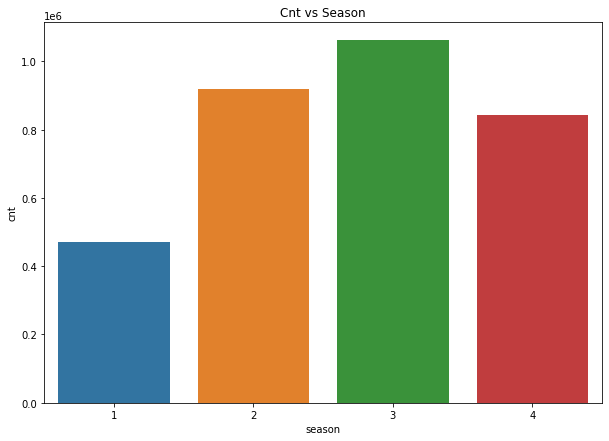

In [209]:
plt.figure(figsize=(10,7))
sns.barplot(x="season", y="cnt", data=df, ci = None, estimator = sum)
plt.title("Cnt vs Season")
plt.show()

Season 3 has the largest count of bike rentals of the 4 seasons. Season 1 has teh least amount of bike rentals.

In [210]:
seasons = df.groupby(['season']).sum()['cnt']
seasons = seasons.sort_values(ascending = False)
print("Max season is Season", seasons.index[0], 'with a cnt of', seasons[0])
print("Min season is Season", seasons.index[-1], 'with a cnt of', seasons[-1])

Max season is Season 3 with a cnt of 1061129
Min season is Season 1 with a cnt of 471348


## Implement a bar chart for working day versus count. Document how bike rides are distributed across these two classes.

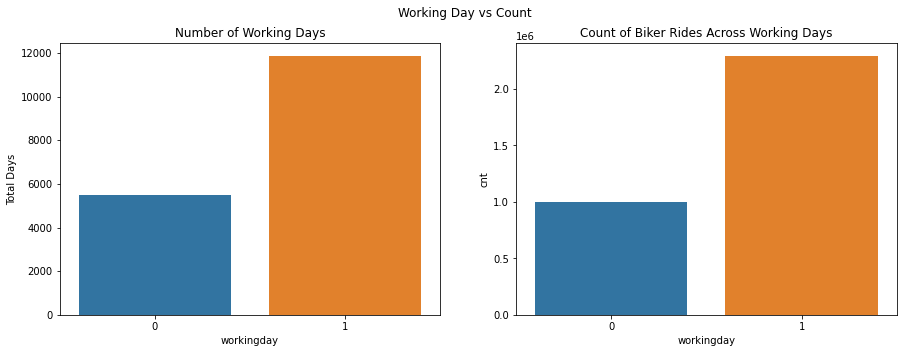

In [211]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))
fig.suptitle('Working Day vs Count')

sns.barplot(ax = axes[0], x=df.workingday.value_counts().index, y=df.workingday.value_counts())
axes[0].set_ylabel("Total Days")
axes[0].set_xlabel('workingday')
axes[0].set_title('Number of Working Days')

sns.barplot(ax = axes[1], x="workingday", y="cnt", data=df, ci = None, estimator = sum)
axes[1].set_title('Count of Biker Rides Across Working Days')
plt.show()


The proportion of workingdays recorded is the same as the proportion of bikes rented on those days, with it being a working day having a larger number of total bikes rented.

## Implement a bar chart for month versus count. Document which months have the most bike rides.

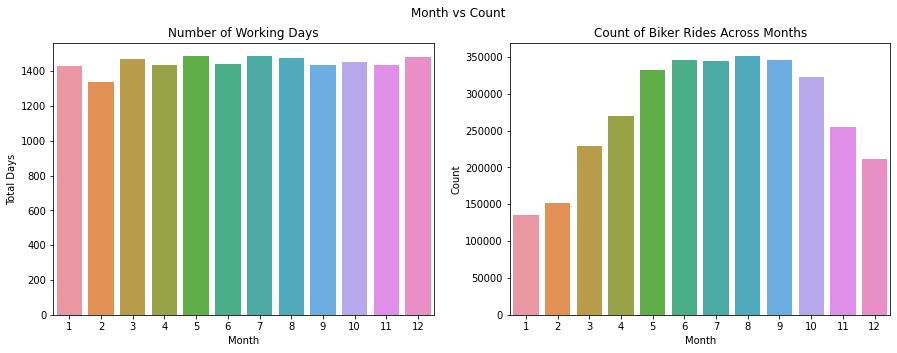

In [212]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))
fig.suptitle('Month vs Count')

sns.barplot(ax = axes[0], x=df.mnth.value_counts().index, y=df.mnth.value_counts())
axes[0].set_ylabel("Total Days")
axes[0].set_xlabel('Month')
axes[0].set_title('Number of Working Days')

sns.barplot(ax = axes[1], x="mnth", y="cnt", data=df, ci = None, estimator = sum)
axes[1].set_title('Count of Biker Rides Across Months')
axes[1].set_ylabel("Count")
axes[1].set_xlabel('Month')
plt.show()

There are about the same number of entries for each month, but it appears that there are more bikes rented out during the summer months, such as July and August.

## Implement code to figure out which months belong to which seasons.

In [213]:
df.groupby(['season', 'mnth']).size() 

season  mnth
1       1       1429
        2       1341
        3        949
        4          0
        5          0
        6          0
        7          0
        8          0
        9          0
        10         0
        11         0
        12       523
2       1          0
        2          0
        3        524
        4       1437
        5       1488
        6        960
        7          0
        8          0
        9          0
        10         0
        11         0
        12         0
3       1          0
        2          0
        3          0
        4          0
        5          0
        6        480
        7       1488
        8       1475
        9       1053
        10         0
        11         0
        12         0
4       1          0
        2          0
        3          0
        4          0
        5          0
        6          0
        7          0
        8          0
        9        384
        10      1451
        11      1437


Season 1: Months 1, 2, 3, 12

Season 2: Months 3, 4, 5, 6

Season 3: Months 6, 7, 8, 9

Season 4: Months 9, 10, 11, 12

## Implement a bar plot of weathersit versus cnt. Document which weather situation has less bike rentals.

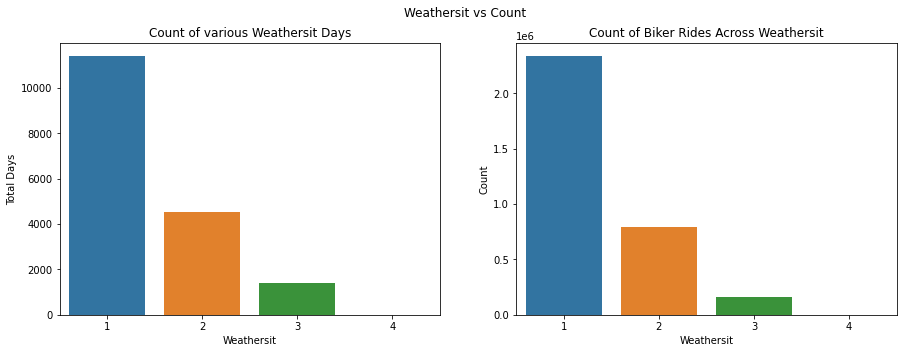

In [214]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))
fig.suptitle('Weathersit vs Count')

sns.barplot(ax = axes[0], x=df.weathersit.value_counts().index, y=df.weathersit.value_counts())
axes[0].set_ylabel("Total Days")
axes[0].set_xlabel('Weathersit')
axes[0].set_title('Count of various Weathersit Days')

sns.barplot(ax = axes[1], x="weathersit", y="cnt", data=df, ci = None, estimator = sum)
axes[1].set_title('Count of Biker Rides Across Weathersit')
axes[1].set_ylabel("Count")
axes[1].set_xlabel('Weathersit')
plt.show()

The proportion of weathersit days recored corresponds with the total number of bikes rented on those days, with weathersit = 1 (clear days) having the most bikes rented.

## Implement a point plot of weathersit on the x-axis, count on the y-axis, andthe season as the hue. Document how season and weathersit arerelated.

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

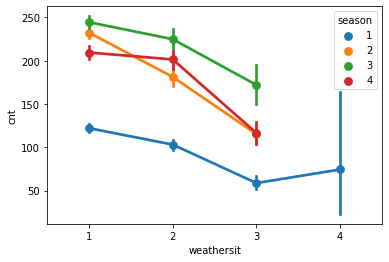

In [215]:
sns.pointplot(x="weathersit", y="cnt", hue = 'season', data=df)

Season 1 (winter) had the lowest number of bikes rented, and when the weather is clear is when most bikes are rented.

## Implement a bar plot of hour versus count. Are there any specific hoursthat are busier than others?

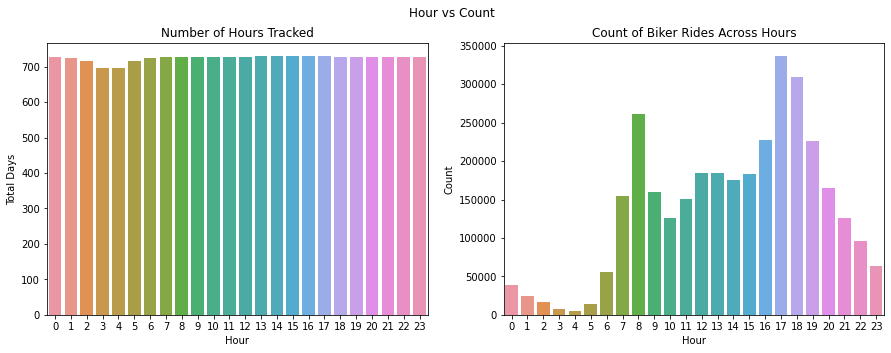

In [216]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))
fig.suptitle('Hour vs Count')

sns.barplot(ax = axes[0], x=df.hr.value_counts().index, y=df.hr.value_counts())
axes[0].set_ylabel("Total Days")
axes[0].set_xlabel('Hour')
axes[0].set_title('Number of Hours Tracked')

sns.barplot(ax = axes[1], x="hr", y="cnt", data=df, ci = None, estimator = sum)
axes[1].set_title('Count of Biker Rides Across Hours')
axes[1].set_ylabel("Count")
axes[1].set_xlabel('Hour')
plt.show()

There are about the same number of entries for each hour, but it appears that there are more bikes rented out during the hours right before work (8:00) and after work (5:00).

## Implement a bar plot of hour versus count on weekends and holidays(when workingday = 0). Does the hourly trend change on weekends?

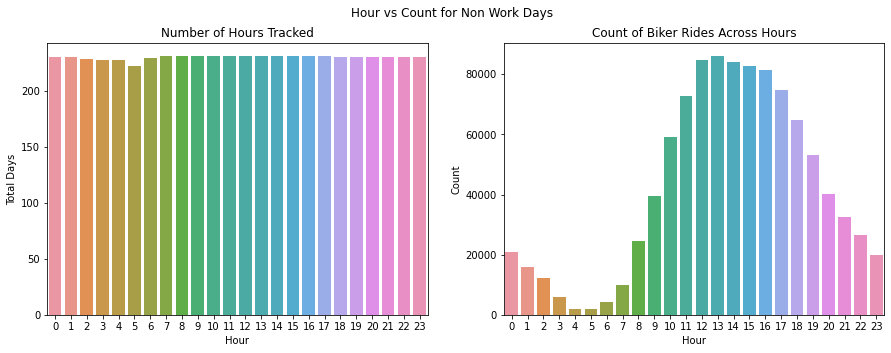

In [217]:
non_workingday = df[df['workingday'] == 0]

fig, axes = plt.subplots(1, 2, figsize = (15,5))
fig.suptitle('Hour vs Count for Non Work Days')

sns.barplot(ax = axes[0], x=non_workingday.hr.value_counts().index, y=non_workingday.hr.value_counts())
axes[0].set_ylabel("Total Days")
axes[0].set_xlabel('Hour')
axes[0].set_title('Number of Hours Tracked')

sns.barplot(ax = axes[1], x="hr", y="cnt", data=non_workingday, ci = None, estimator = sum)
axes[1].set_title('Count of Biker Rides Across Hours')
axes[1].set_ylabel("Count")
axes[1].set_xlabel('Hour')
plt.show()

There are about the same number of entries for each hour, but it appears that there is no longer a large gap in the middle showing people working. Instead, the distribution is much more smooth with a peak around 1:00.

# Part 2: Data Preparation
* Implement and graph a correlation matrix with the remaining numericfeatures. Any interesting relationships?
* Scale the numerical features using StandardScaler(), and replacetheoriginal columns in your dataframe. 
* Drop the following columns from your dataset: casual, registered, dteday,
instant. 
* Implement a histogram of the count column. What can be said basedonthe resulting distribution?
* Implement a train/test split with a test size of 33%. 
* Implement a baseline linear regression algorithm. Use cross-validationtooutput r2 and mse. Calculate RMSE base on mse. Document your scores.

## Implement and graph a correlation matrix with the remaining numeric features. Any interesting relationships?

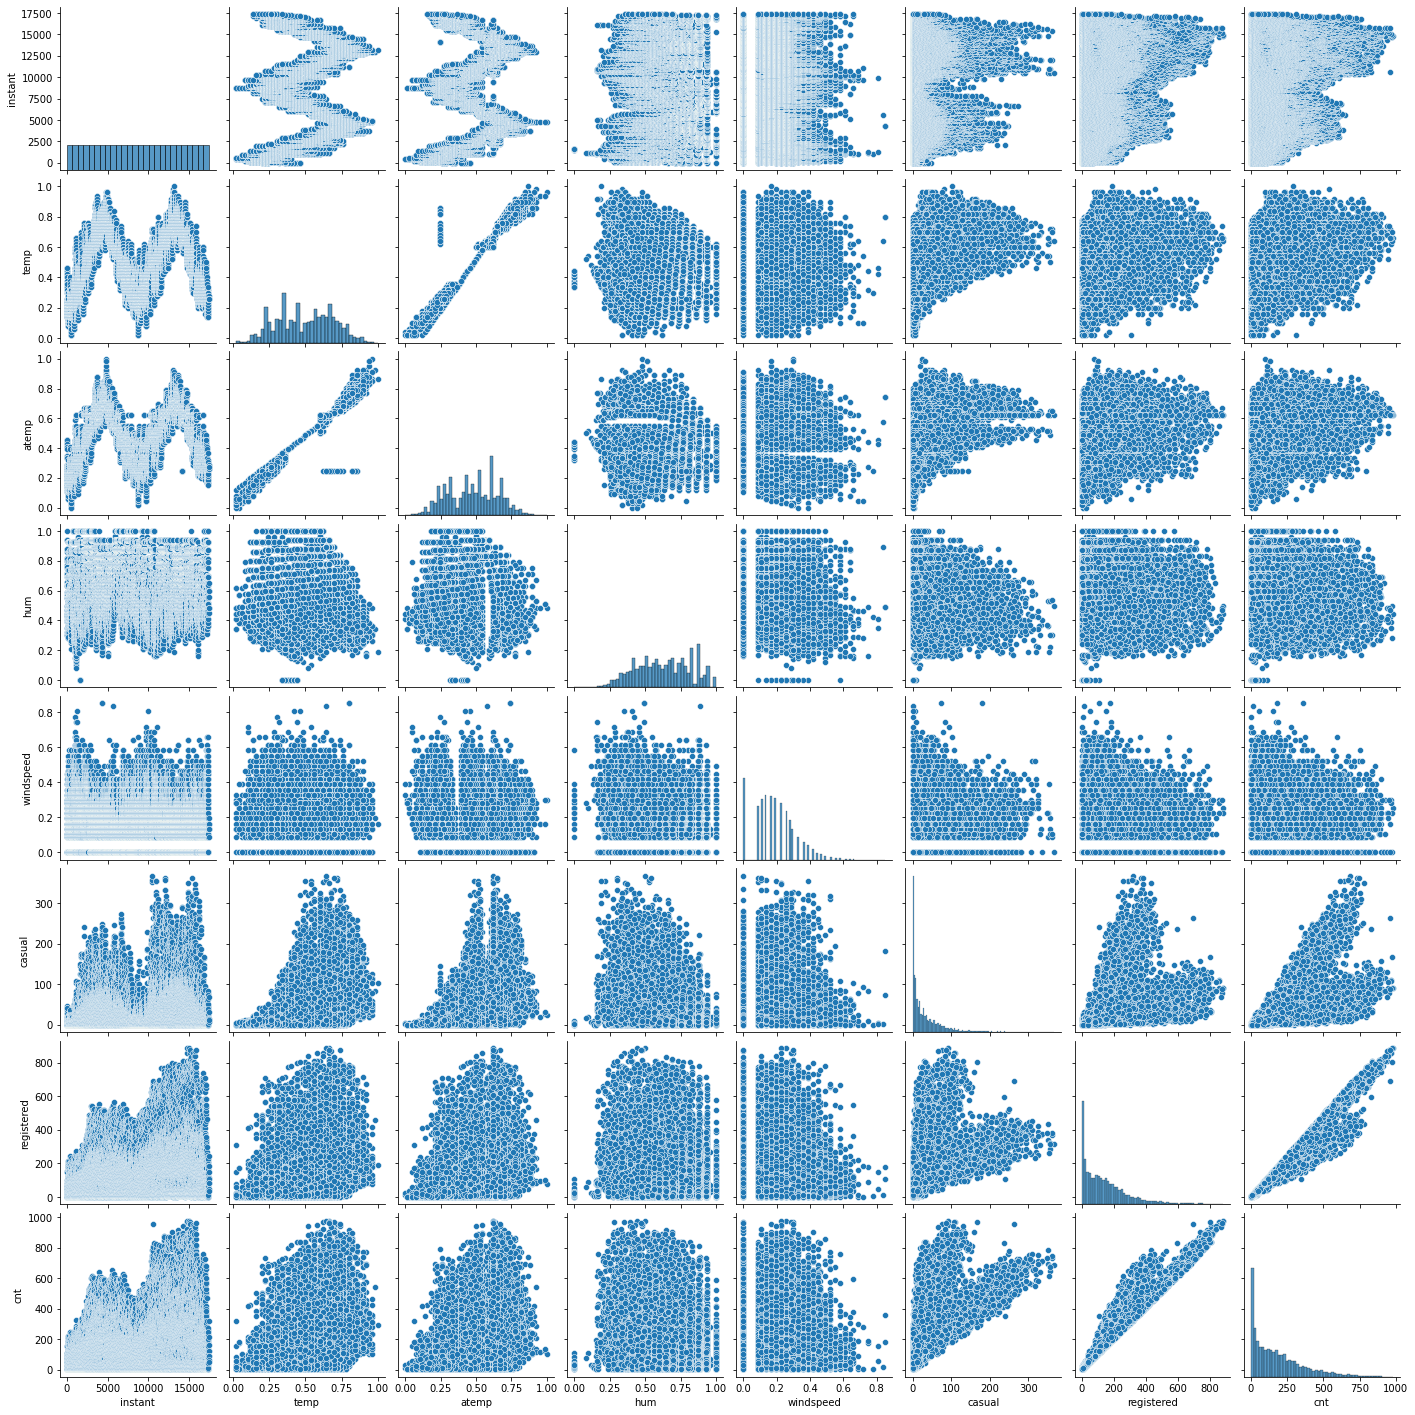

In [218]:
sns.pairplot(df)
plt.show()

I found the relationship between temp and count to be most interesting, with it appearing that a higher temp suggests a larger count value.

## Scale the numerical features using StandardScaler(), and replacetheoriginal columns in your dataframe.

In [219]:
cols = ['instant', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
temp = df[cols]
scaler = StandardScaler()
scaler.fit(temp)
temp = scaler.transform(temp)
df = pd.concat([df.drop(cols, axis = 1), pd.DataFrame(temp, columns = cols)], axis=1)
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,instant,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,-1.731951,-1.334648,-1.093281,0.947372,-1.553889,-0.662755,-0.930189,-0.956339
1,2011-01-01,1,0,1,1,0,6,0,1,-1.731752,-1.438516,-1.181732,0.895539,-1.553889,-0.561343,-0.804655,-0.824022
2,2011-01-01,1,0,1,2,0,6,0,1,-1.731552,-1.438516,-1.181732,0.895539,-1.553889,-0.622190,-0.837690,-0.868128
3,2011-01-01,1,0,1,3,0,6,0,1,-1.731353,-1.334648,-1.093281,0.636370,-1.553889,-0.662755,-0.950010,-0.972879
4,2011-01-01,1,0,1,4,0,6,0,1,-1.731154,-1.334648,-1.093281,0.636370,-1.553889,-0.723603,-1.009474,-1.039037


## Drop the following columns from your dataset: casual, registered, dteday, instant.

In [118]:
df = df.drop(['casual', 'registered', 'dteday', 'instant'], axis = 1)

## Implement a histogram of the count column. What can be said basedonthe resulting distribution?

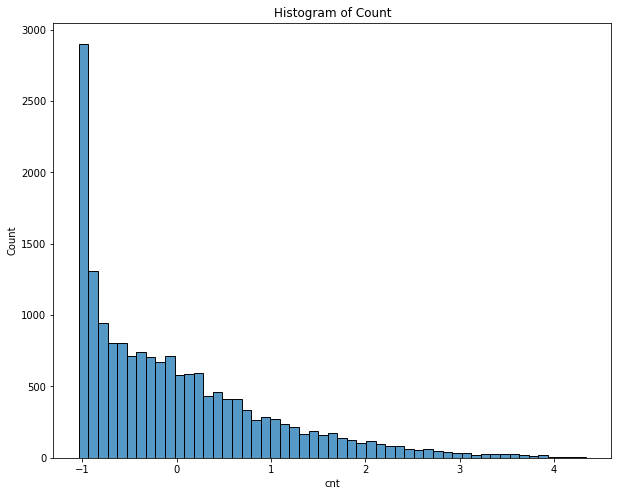

In [122]:
plt.figure(figsize = (10,8))
sns.histplot(data = df, x = 'cnt')
plt.title("Histogram of Count")
plt.show()

## Implement a train/test split with a test size of 33%.

In [129]:
X = df.drop(['cnt'], axis = 1)
y = df['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33)

## Implement a baseline linear regression algorithm. Use cross-validation to output r2 and mse. Calculate RMSE base on mse. Document your scores.

In [154]:
scoring = {'neg_mse': 'neg_mean_squared_error', 'r_squared': 'r2'}
scores = cross_validate(LinearRegression(), X, y, cv = 10, scoring = scoring, return_train_score = True)

print("R2 Scores:", np.mean(scores['test_r_squared']))
print("MSE Scores:", np.mean(-scores['test_neg_mse']))
print("RMSE Scores:", np.mean(np.sqrt(-scores['test_neg_mse'])))

R2 Scores: 0.15994862575842855
MSE Scores: 0.6364163311300864
RMSE Scores: 0.7703754946344323


# Part 3: Model Training
* Create one-hot-encoded values for your categorical columns usingget_dummies and add them to your source dataset. 
* Drop the original categorical columns from your source dataset. 
* Do a test/train split based on your new source dataset. Implement andfit anew linear model on your new training set.
* What are the new values for r2, mse, and rmse?
* Implement and score a decision tree regressor with random_state=0. 
* Implement and score a RandomForestRegressor with random_state=0and n_esitmators=30. 
* Implement and score an SGDRegressor with max_iter=1000 andtol=1e-3).
* Implement and score a Lasso Regressor with alpha=0.1. 
* Implement and score an ElasticNet Regressor with random_state=0. 
* Implement and score a Ridge Regressor with alpha=0.5. 
* Implement and score a BaggingRegressor.

## Create one-hot-encoded values for your categorical columns usingget_dummies and add them to your source dataset. 

## Drop the original categorical columns from your source dataset.

In [157]:
df = pd.get_dummies(df)
df.head()

,temp,atemp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,yr_0,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,-1.334648,-1.093281,0.947372,-1.553889,-0.956339,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
1,-1.438516,-1.181732,0.895539,-1.553889,-0.824022,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
2,-1.438516,-1.181732,0.895539,-1.553889,-0.868128,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
3,-1.334648,-1.093281,0.636370,-1.553889,-0.972879,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
4,-1.334648,-1.093281,0.636370,-1.553889,-1.039037,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0


## Do a test/train split based on your new source dataset. Implement and fit a new linear model on your new training set.

In [159]:
X = df.drop(['cnt'], axis = 1)
y = df['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33)

In [160]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

## What are the new values for r2, mse, and rmse?

In [165]:
predictions = lr.predict(X_test)
print("The R2 value is:", r2_score(predictions, y_test))
print("The MSE value is:", mean_squared_error(predictions, y_test))
print("The RMSE value is:", np.sqrt(mean_squared_error(predictions, y_test)))

The R2 value is: 0.5565521020923991
The MSE value is: 0.30562631650365485
The RMSE value is: 0.552834800373181


## Implement and score a decision tree regressor with random_state=0.

In [168]:
dt = DecisionTreeRegressor(random_state = 0)
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)
print("The R2 value is:", r2_score(dt_predictions, y_test))
print("The MSE value is:", mean_squared_error(dt_predictions, y_test))
print("The RMSE value is:", np.sqrt(mean_squared_error(dt_predictions, y_test)))

The R2 value is: 0.8360012815988389
The MSE value is: 0.16335708539351268
The RMSE value is: 0.4041745729180804


## Implement and score a RandomForestRegressor with random_state=0and n_esitmators=30.

In [171]:
rf = RandomForestRegressor(random_state = 0, n_estimators = 30)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
print("The R2 value is:", r2_score(rf_predictions, y_test))
print("The MSE value is:", mean_squared_error(rf_predictions, y_test))
print("The RMSE value is:", np.sqrt(mean_squared_error(rf_predictions, y_test)))

The R2 value is: 0.9114087700766907
The MSE value is: 0.07857900338095905
The RMSE value is: 0.2803194666464658


## Implement and score an SGDRegressor with max_iter=1000 andtol=1e-3).

In [173]:
sgd = SGDRegressor(max_iter=1000, tol = 1e-3)
sgd.fit(X_train, y_train)
sgd_predictions = sgd.predict(X_test)
print("The R2 value is:", r2_score(sgd_predictions, y_test))
print("The MSE value is:", mean_squared_error(sgd_predictions, y_test))
print("The RMSE value is:", np.sqrt(mean_squared_error(sgd_predictions, y_test)))

The R2 value is: 0.5332583184148947
The MSE value is: 0.3066347003351547
The RMSE value is: 0.553746061236696


## Implement and score a Lasso Regressor with alpha=0.1.

In [176]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_predictions = lasso.predict(X_test)
print("The R2 value is:", r2_score(lasso_predictions, y_test))
print("The MSE value is:", mean_squared_error(lasso_predictions, y_test))
print("The RMSE value is:", np.sqrt(mean_squared_error(lasso_predictions, y_test)))

The R2 value is: -4.351355775015938
The MSE value is: 0.7272379492706549
The RMSE value is: 0.8527824747675429


## Implement and score an ElasticNet Regressor with random_state=0.

In [179]:
EN = ElasticNet(random_state = 0)
EN.fit(X_train, y_train)
EN_predictions = EN.predict(X_test)
print("The R2 value is:", r2_score(EN_predictions, y_test))
print("The MSE value is:", mean_squared_error(EN_predictions, y_test))
print("The RMSE value is:", np.sqrt(mean_squared_error(EN_predictions, y_test)))

The R2 value is: 0.0
The MSE value is: 0.9713438546552013
The RMSE value is: 0.985567782882132


## Implement and score a Ridge Regressor with alpha=0.5.

In [181]:
ridge = Ridge(alpha=.5)
ridge.fit(X_train, y_train)
ridge_predictions = ridge.predict(X_test)
print("The R2 value is:", r2_score(ridge_predictions, y_test))
print("The MSE value is:", mean_squared_error(ridge_predictions, y_test))
print("The RMSE value is:", np.sqrt(mean_squared_error(ridge_predictions, y_test)))

The R2 value is: 0.5559184343274581
The MSE value is: 0.30560639508279996
The RMSE value is: 0.5528167825625412


## Implement and score a BaggingRegressor.

In [183]:
BR = BaggingRegressor()
BR.fit(X_train, y_train)
BR_predictions = BR.predict(X_test)
print("The R2 value is:", r2_score(BR_predictions, y_test))
print("The MSE value is:", mean_squared_error(BR_predictions, y_test))
print("The RMSE value is:", np.sqrt(mean_squared_error(BR_predictions, y_test)))

The R2 value is: 0.9039779991726118
The MSE value is: 0.08462310575807232
The RMSE value is: 0.29090050834962855


# Part 4: Model Tuning
* Take the top three performing models and implement cross-validation on them. 
    * Hint: They should be Decision Tree Regressor, RandomForestRegressor, and BaggingRegressor. 
* Take your top performing model (mine was the RandomForestRegressor)
and do a randomize search cv with 20 iterations and three folds.
    * I found it is best to set your n_jobs = (# of cpu’s you have –1). Thistook about 10 minutes on my MacBook with 4 CPUs and 8GBof
memory. 
    * Your param distributions should include the following:
        * Bootstrap: true, false
        * Max_depth: 10-110, number of bins 11
        * Max_features: auto, sqrt
        * Min_samples_split: 2,5,10
        * Min_samples_leaf: 1,2,4
        * N_estimators: 200 – 2000, number of bins 10
* Take your best_estimator_ and see how it compares by doing cross_valsfor r2, mse, and calculating rmse.

## Take the top three performing models and implement cross-validation on them

In [188]:
# Top models:  Decision Tree Regressor, RandomForestRegressor, and BaggingRegressor
ensemble=[dt, rf, BR] 
scoring = {'neg_mse': 'neg_mean_squared_error', 'r_squared': 'r2'}
best_r2 = [-np.inf, None]
best_mse = [np.inf, None]
best_rmse = [np.inf, None]
for i in range(len(ensemble)):
    model = ensemble[i]
    scores = cross_validate(model, X, y, cv = 10, scoring = scoring, return_train_score = True)
    if np.mean(scores['test_r_squared']) > best_r2[0]:
        best_r2 = [np.mean(scores['test_r_squared']), model]
    if np.mean(-scores['test_neg_mse']) < best_mse[0]:
        best_mse = [np.mean(-scores['test_neg_mse']), model]
    if np.mean(np.sqrt(-scores['test_neg_mse'])) < best_rmse[0]:
        best_rmse = [np.mean(np.sqrt(-scores['test_neg_mse'])), model]
print(best_r2, best_mse, best_rmse) # Random Forest is best model

[0.7633075828844162, RandomForestRegressor(n_estimators=30, random_state=0)] [0.14966757904737968, RandomForestRegressor(n_estimators=30, random_state=0)] [0.3815533335525935, RandomForestRegressor(n_estimators=30, random_state=0)]


## Take your top performing model (mine was the RandomForestRegressor) and do a randomize search cv with 20 iterations and three folds

In [201]:
rf = RandomForestRegressor(n_estimators = 30, random_state = 0)
distributions = {'bootstrap': [True, False], 'max_depth': [i for i in range(10,121, 11)],
                 'max_features': ['auto', 'sqrt'],
                 'min_samples_split': [2,5,10], 'min_samples_leaf': [1,2,4], 
                 'n_estimators': [i for i in range(200, 2010, 10)]}
reg = RandomizedSearchCV(rf, distributions, cv = 20, n_jobs = 3).fit(X, y)

In [202]:
model = reg.best_estimator_
scoring = {'neg_mse': 'neg_mean_squared_error', 'r_squared': 'r2'}
scores = cross_validate(model, X, y, cv = 10, scoring = scoring, return_train_score = True)

print("R2 Scores:", np.mean(scores['test_r_squared']))
print("MSE Scores:", np.mean(-scores['test_neg_mse']))
print("RMSE Scores:", np.mean(np.sqrt(-scores['test_neg_mse'])))

R2 Scores: 0.7736203055183024
MSE Scores: 0.14393864033376352
RMSE Scores: 0.37384568283307634


Note these scores are slight improvements from the scores above.